<a href="https://colab.research.google.com/github/Creatrohit9/AIRBNB-PROJECT-1-CAPSTON/blob/main/MD1WK4ROHIT_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

.## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **Libraries Prepration for the  Data Analysis and plot**

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
from numpy import math        #used for perform math on scalar data
from numpy import loadtxt     #fast reader for simple text files
import matplotlib.pyplot as plt
%matplotlib inline  
import matplotlib.image as mpimg      #

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : b5958ee1999e9aead1938c0bba2b674378807b3d
python           : 3.7.11.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.4.104+
Version          : #1 SMP Sat Jun 5 09:50:34 PDT 2021
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.1.5
numpy            : 1.19.5
pytz             : 2018.9
dateutil         : 2.8.1
pip              : 21.1.3
setuptools       : 57.2.0
Cython           : 0.29.23
pytest           : 3.6.4
hypothesis       : None
sphinx           : 1.8.5
blosc            : None
feather          : 0.4.1
xlsxwriter       : None
lxml.etree       : 4.2.6
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.7.6.1 (dt dec pq3 ext lo64)
jinja2           : 2.11.3
IPython          : 5.5.0
pandas_datareader: 0.9.0
bs4              : 4.6.3
bottleneck       : 1.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
file_path='/content/drive/MyDrive/Airbnb NYC 2019.csv'
airbnb_df=pd.read_csv(file_path)

# **RESEARCH **
Reagarding host-
  -Who are the top earners
  -Is there any relationship between monthly earnig and price
Regarding the Neighbourhood- 
  -Any perticular location getting maximum number of bookings
  -Price realtionwith respect to location
Regarding the reviews-
   -Relationship between Quality and price
Regarding Price-
   -privce vs amenities
   -Price vs location      

# **Data Summary**

In [6]:
#read first five row  of data 
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
#no or row and columns we are going to deal
airbnb_df.shape

(48895, 16)

In [8]:
#Name of columns we have in our data base 
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# **Descriptive Analysis**

In [9]:
#value through we are goin to deal
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


-All colunms except latitude and longitude have a big gap between the third quartilevalue and the max value.
-The min value of the price is 0

In [10]:
# data information we have
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

we have 10052 missing value in column such last_review  and reviews_per_month

In [11]:
#find the maximum no of selection of room type
airbnb_df['room_type'].value_counts().idxmax()

'Entire home/apt'

In [12]:
#now these are the room type behalf on which we make further analysis 
airbnb_df_refine=airbnb_df['room_type'].value_counts()

In [38]:
airbnb_df_refine

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [13]:
airbnb_df['room_type']

0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48895, dtype: object

In [14]:
airbnb_df.loc[45:,'room_type']

45       Entire home/apt
46          Private room
47       Entire home/apt
48       Entire home/apt
49          Private room
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48850, dtype: object

In [15]:
airbnb_df.mean()

id                                1.901714e+07
host_id                           6.762001e+07
latitude                          4.072895e+01
longitude                        -7.395217e+01
price                             1.527207e+02
minimum_nights                    7.029962e+00
number_of_reviews                 2.327447e+01
reviews_per_month                 1.373221e+00
calculated_host_listings_count    7.143982e+00
availability_365                  1.127813e+02
dtype: float64

# **Cleaning the data**

In [16]:
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [17]:
airbnb_df.drop(['id','host_name','last_review'],axis=1,inplace=True)

In [18]:
airbnb_df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [19]:
airbnb_df.shape

(48895, 13)

In [20]:
airbnb_df['reviews_per_month'].fillna({'reviews_per_month':0},inplace=True)

In [21]:
airbnb_df.reviews_per_month.isnull().sum()   #examin change

10052

# **Data observation**

In [22]:
#let's examin some intrested unique neighbourhood_group value
airbnb_df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [23]:
#let's examin some intrested unique neighbourhood_group value
airbnb_df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [24]:
#out of 48894 their are how much no of unique value
len(airbnb_df.neighbourhood.unique())

221

In [25]:
#let's examin some intrested unique room_type value
airbnb_df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [26]:
#calculate the most listed  host id who takes maximu benifits from this platform 
top_host=airbnb_df.host_id.value_counts().head(10)

In [27]:
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [28]:
# finding with already existing columns
top_host_check=airbnb_df.calculated_host_listings_count.max()

In [29]:
top_host_check

327

# **let's Get start doing data visualization **

In [30]:
#setting size of the figure for the future visualization
sns.set({'figure.figsize':(10,8)})
sns.set_style('white')

In [31]:
top_host_df=pd.DataFrame(top_host)

In [32]:
top_host_df.reset_index(inplace=True)

In [33]:
top_host_df.rename(columns={'index':'T-host','host_id':'host_Value'},inplace=True)

In [34]:
top_host_df

,T-host,host_Value
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


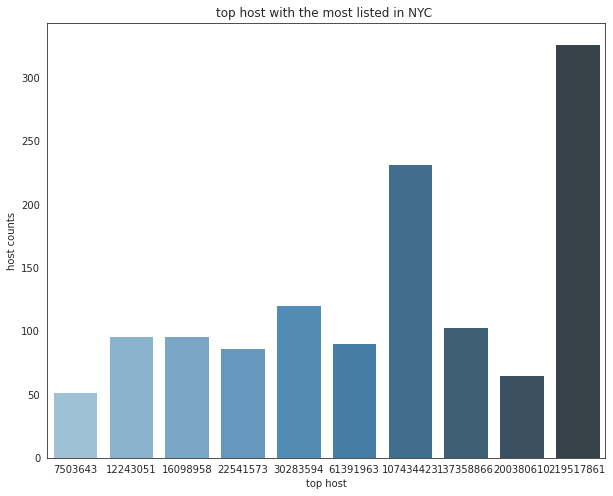

In [35]:
visual1=sns.barplot(x='T-host',y='host_Value',data=top_host_df,palette="Blues_d")
visual1.set_title('top host with the most listed in NYC ')
visual1.set_ylabel('host counts')
visual1.set_xlabel('top host')
visual1.set_xticks(visual1.get_xticks())


In [62]:
#insights from our neighbourhood 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx
#for Brooklyn
price_1=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Brooklyn']
price_1list=price_1[['price']]
#'Manhattan
price_2=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Manhattan']
price_2list=price_2[['price']]
#'Queens
price_3=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Queens']
price_3list=price_3[['price']]
#'Staten island
price_4=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Staten Island']
price_4list=price_4[['price']]
#Bronx
price_5=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Bronx']
price_5list=price_5[['price']]
final_price_list=[price_1list,price_2list,price_3list,price_4list,price_5list]

In [63]:
final_price_list

[       price
 0        149
 3         89
 6         60
 12        89
 15       140
 ...      ...
 48882     40
 48884    190
 48887    170
 48890     70
 48891     40
 
 [20104 rows x 1 columns],        price
 1        225
 2        150
 4         80
 5        200
 7         79
 ...      ...
 48886    200
 48888    125
 48892    115
 48893     55
 48894     90
 
 [21661 rows x 1 columns],        price
 46       130
 77        70
 143      140
 161       79
 181      350
 ...      ...
 48858     68
 48863     93
 48866     58
 48878     45
 48889     65
 
 [5666 rows x 1 columns],        price
 169       70
 249       36
 250       37
 251       37
 256       36
 ...      ...
 48441     40
 48446    100
 48533    450
 48649     54
 48799    235
 
 [373 rows x 1 columns],        price
 171       40
 207       45
 260       90
 261      105
 309       90
 ...      ...
 48783    140
 48792     80
 48795    125
 48796     70
 48805    100
 
 [1091 rows x 1 columns]]

In [66]:
list_of_price=[]
#creating list with known values in neighbourhood_group column
list_of_price=[]
new_list=['Brooklyn','Manhattan','Queens','Staten Island','Bronx']

for x in final_price_list:
    a=x.describe(percentiles=[.25, .50, .75])
    a=a.iloc[3:]
    a.reset_index(inplace=True)
    a.rename(columns={'index':'Stats'}, inplace=True)
    list_of_price.append(a)
#changing names of the price column to the area name for easier reading of the table    
list_of_price[0].rename(columns={'price':new_list[0]}, inplace=True)
list_of_price[1].rename(columns={'price':new_list[1]}, inplace=True)
list_of_price[2].rename(columns={'price':new_list[2]}, inplace=True)
list_of_price[3].rename(columns={'price':new_list[3]}, inplace=True)
list_of_price[4].rename(columns={'price':new_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=list_of_price
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0
